# Load and Analyze Data for Descriptive Statistics

This section involves the loading of the dataset and performing basic descriptive statistical operations. The objectives are:

1. Load the dataset into a pandas DataFrame.
2. dentify numerical columns in the DataFrame.
3. Calculate and display basic statistics like mean, median, standard deviation, and mode for numerical columns.


In [1]:
# Load necessary packages
import pandas as pd

# Load data
data = pd.read_csv('datasets/sales_data_with_discounts.csv')

# Display first & last few rows of data
data

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [4]:
# Compute basic statistics for numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
# Calculating descriptive statistics
data[numerical_columns].describe()


,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


Data Visualization
This section aims to visually analyze the dataset. Three types of visualizations are created:

Histograms: Useful for understanding the frequency distribution of numerical data.
Boxplots: Used to identify variability and detect outliers.
Bar Charts: Provide counts of each category in categorical columns.

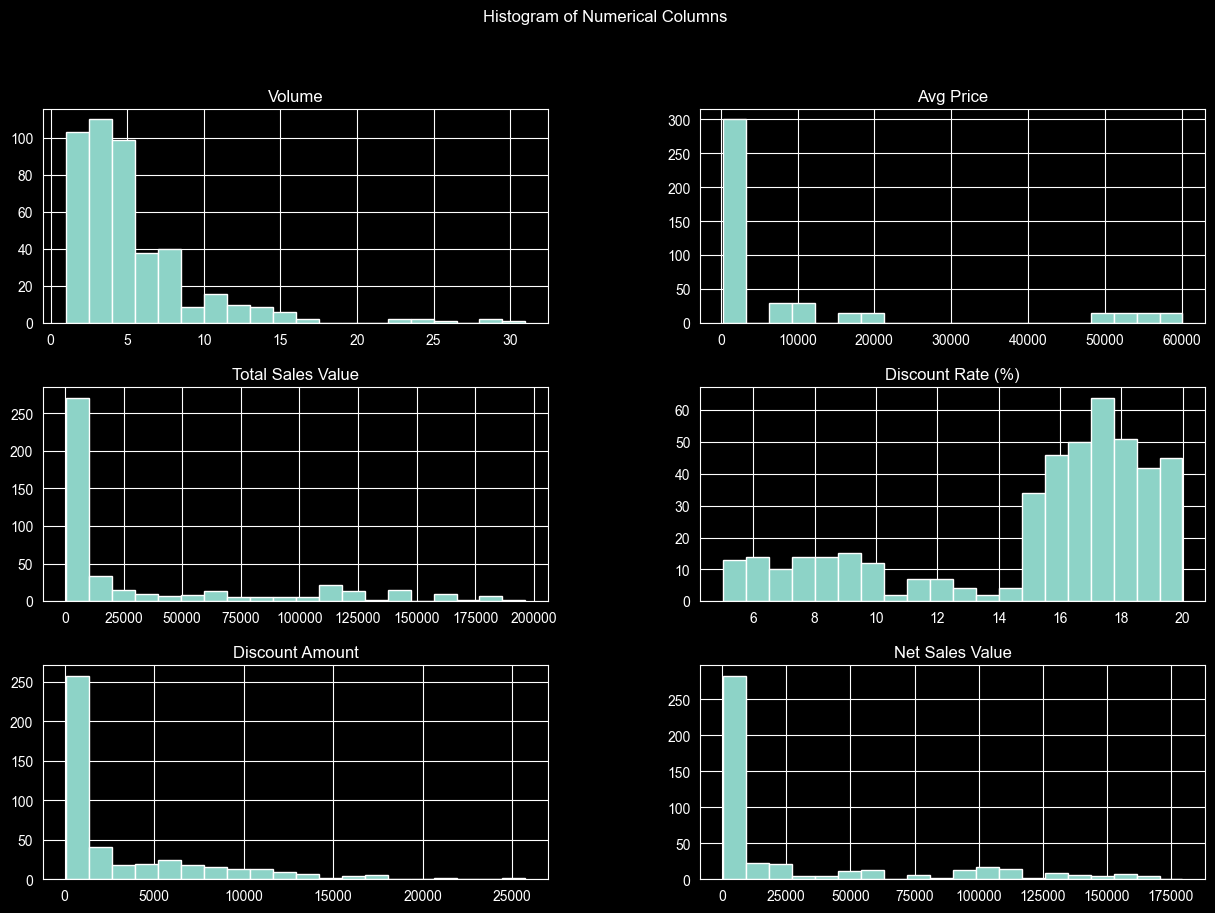

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical columns
data[numerical_columns].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histogram of Numerical Columns')
plt.show()


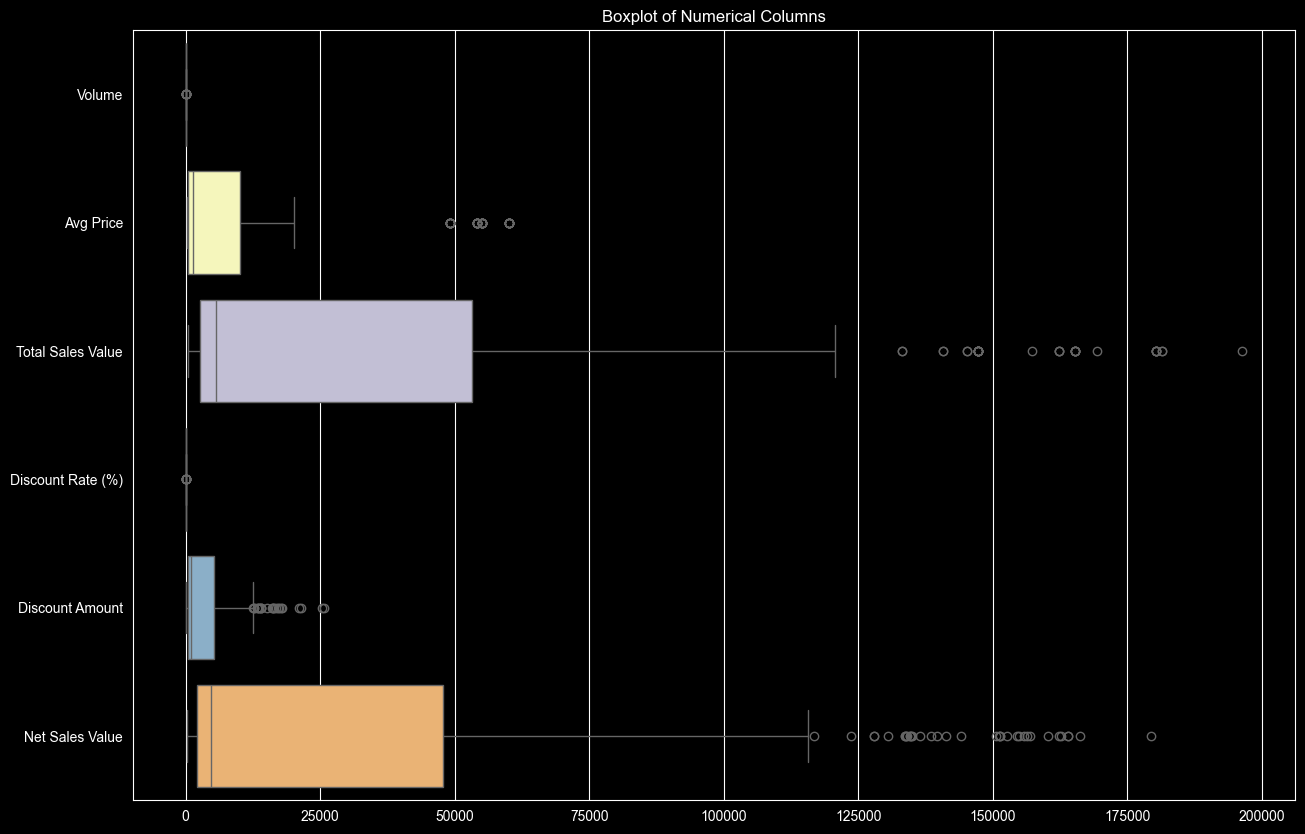

In [6]:
# Plot boxplots for numerical columns to observe variability and outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=data[numerical_columns], orient='h')
plt.title('Boxplot of Numerical Columns')
plt.show()

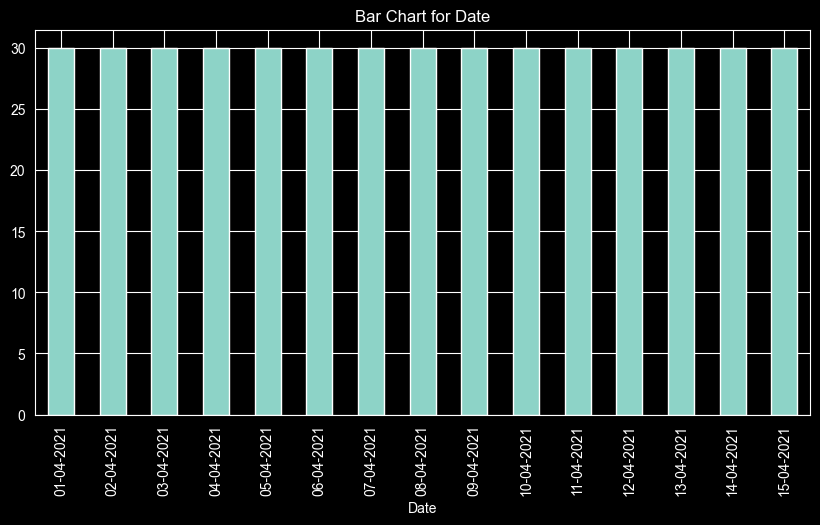

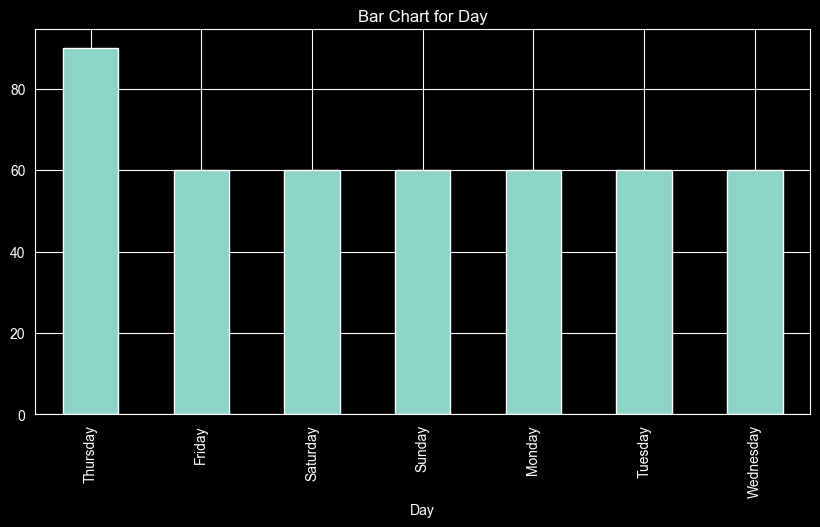

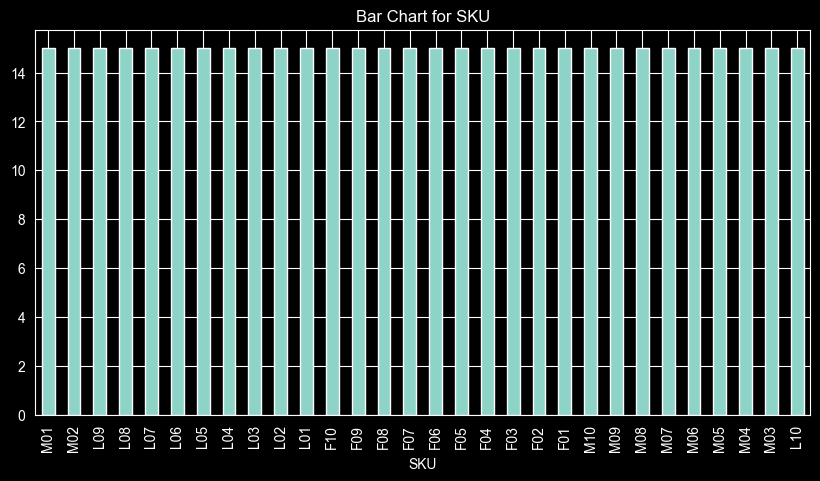

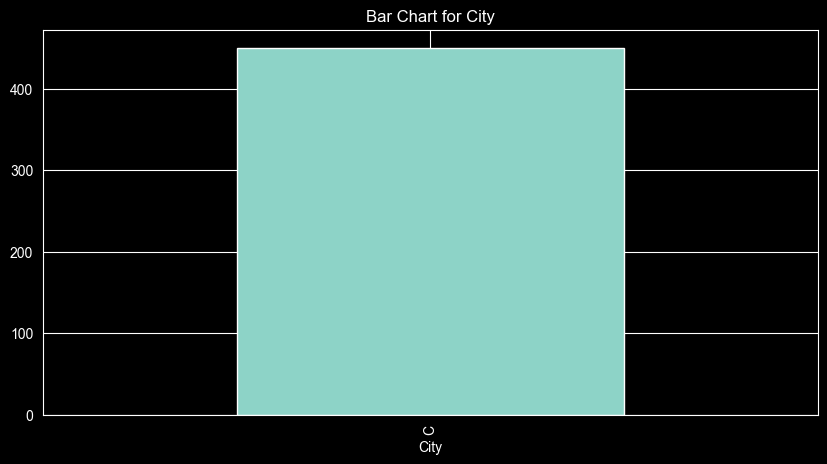

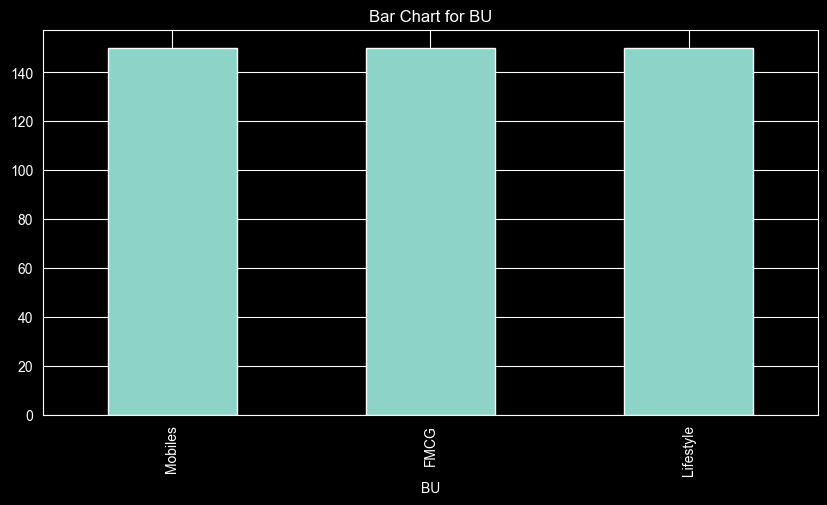

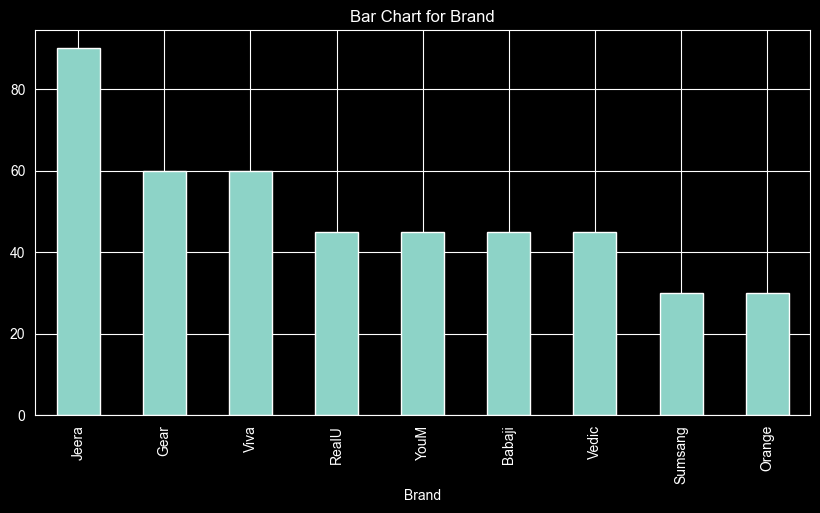

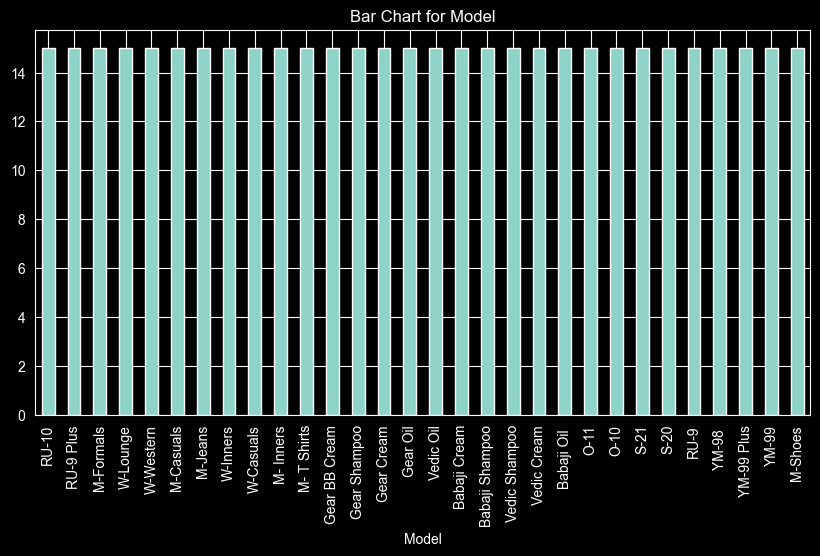

In [7]:
# Bar chart for categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    data[col].value_counts().plot(kind='bar', figsize=(10, 5))
    plt.title(f'Bar Chart for {col}')
    plt.show()

## Data Standardization

Standardizing data helps to bring all the features to a similar scale, making them comparable. Here, we perform:

- Z-score normalization using StandardScaler.
- Manual computation of Z-scores to compare results.


In [8]:
from sklearn.preprocessing import StandardScaler

# Using StandardScaler
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data[numerical_columns])
standardized_df = pd.DataFrame(standardized_data, columns=numerical_columns)

standardized_df

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,2.350029,0.091173,2.925721,-0.830289,3.952816,2.804756
1,1.167129,-0.019570,1.330995,-0.852661,1.849014,1.271026
2,0.457388,0.312659,1.562775,-1.351631,1.622995,1.545675
3,0.220808,0.534146,1.719276,-1.949723,1.113807,1.765810
4,-0.488932,-0.130313,-0.188452,0.673739,0.227852,-0.227595
...,...,...,...,...,...,...
445,-0.725512,-0.506840,-0.618334,0.076009,-0.653541,-0.610461
446,0.220808,-0.434857,-0.360801,0.451097,-0.152191,-0.378500
447,-0.725512,-0.490229,-0.606448,0.903793,-0.608140,-0.601921
448,-0.488932,-0.473617,-0.556923,0.388474,-0.530379,-0.555499


# Manual Z-score normalization
z_score_normalized = (data[numerical_columns] - data[numerical_columns].mean()) / data[numerical_columns].std()

z_score_normalized

In [9]:
# Manual Z-score normalization
z_score_normalized = (data[numerical_columns] - data[numerical_columns].mean()) / data[numerical_columns].std()

z_score_normalized


,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,2.347417,0.091072,2.922469,-0.829365,3.948422,2.801638
1,1.165831,-0.019548,1.329516,-0.851714,1.846958,1.269613
2,0.456880,0.312312,1.561038,-1.350129,1.621190,1.543957
3,0.220563,0.533552,1.717365,-1.947555,1.112568,1.763847
4,-0.488389,-0.130168,-0.188242,0.672990,0.227598,-0.227342
...,...,...,...,...,...,...
445,-0.724706,-0.506277,-0.617647,0.075924,-0.652815,-0.609783
446,0.220563,-0.434374,-0.360400,0.450596,-0.152022,-0.378079
447,-0.724706,-0.489684,-0.605774,0.902788,-0.607464,-0.601252
448,-0.488389,-0.473091,-0.556303,0.388042,-0.529789,-0.554881



Encoding Categorical Variables
Categorical variables cannot be directly used in many machine learning models. One-hot encoding converts these variables into numerical form.

Steps:

Perform one-hot encoding for all categorical columns using pandas.
Observe the expanded shape and newly created columns.

In [12]:
# Perform one-hot encoding
encoded_data = pd.get_dummies(data, columns=categorical_columns)

# Display encoded data shape and new columns
encoded_data.shape, encoded_data.columns

((450, 101),
 Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
        'Discount Amount', 'Net Sales Value', 'Date_01-04-2021',
        'Date_02-04-2021', 'Date_03-04-2021', 'Date_04-04-2021',
        ...
        'Model_Vedic Cream', 'Model_Vedic Oil', 'Model_Vedic Shampoo',
        'Model_W-Casuals', 'Model_W-Inners', 'Model_W-Lounge',
        'Model_W-Western', 'Model_YM-98 ', 'Model_YM-99', 'Model_YM-99 Plus'],
       dtype='object', length=101))